In [700]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [701]:
df = pd.read_csv('datasets/population-estimates_csv.csv')

In [702]:
df['Population'] = df['Population'] * 10e-7

In [703]:
df.head()

,Region,Country Code,Year,Population
0,WORLD,900,1950,2.536275
1,WORLD,900,1951,2.583817
2,WORLD,900,1952,2.630584
3,WORLD,900,1953,2.677230
4,WORLD,900,1954,2.724302


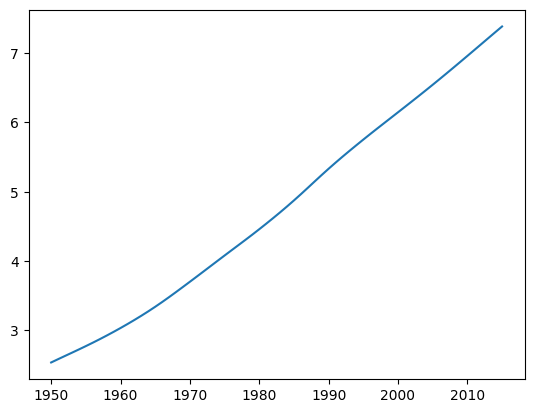

In [704]:
plt.plot(df['Year'], df['Population'])

In [705]:
X = df[['Year']].values
y = df['Population'].values

In [706]:
X = X - X.min()

In [707]:
from sklearn.model_selection import train_test_split

X_train = X[:-10]
y_train = y[:-10]

X_test = X[-10:]
y_test = y[-10:]

In [708]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor


model = make_pipeline(PolynomialFeatures(2), LinearRegression())

In [709]:
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [710]:
def predict_pop(years):
    
    Q = np.array([year - df.Year.min() for year in years]).reshape(-1, 1)
    preds = model.predict(Q)
    return [str(round(pred, 2)) + ' Milliard' for pred in preds]

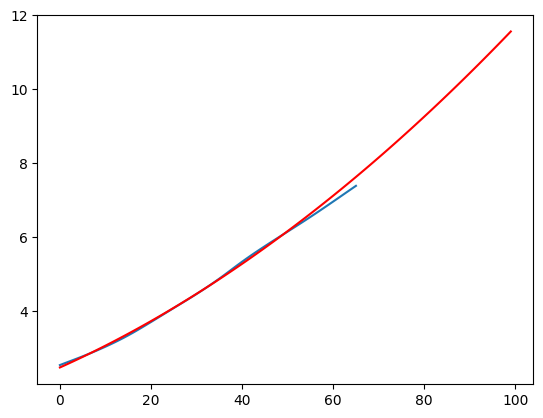

In [711]:
years = np.arange(100).reshape(-1, 1)
plt.plot(X, y)
plt.plot(years,model.predict(years) , c='r')

In [712]:
predict_pop([2022, 2023, 2024, 2100])

['8.36 Milliard', '8.47 Milliard', '8.58 Milliard', '19.05 Milliard']

In [713]:
def relu(x):
    return x if x >= 0 else 0

In [717]:
np_relu = np.frompyfunc(relu,1,1)

In [721]:
X = np.array([1,2,5,-4,-8,-1,9,6,4])

In [722]:
np_relu(X)

array([1, 2, 5, 0, 0, 0, 9, 6, 4], dtype=object)